In [4]:
# --- Week 1: Load US Accidents Dataset ---
import pandas as pd

# Defined the  columns to load (to avoid memory issues because the dataset is too large)
use_columns = [
    'Severity', 'Start_Time', 'End_Time', 'State', 'City',
    'Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Weather_Condition',
    'Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal'
]

# Load the EXTRACTED CSV file (not the .zip!)
df = pd.read_csv('US_Accidents_March23.csv', usecols=use_columns)

print(f"Dataset loaded! Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded! Shape: (7728394, 15)

First 5 rows:
   Severity           Start_Time             End_Time          City State  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00        Dayton    OH   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  Reynoldsburg    OH   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  Williamsburg    OH   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34        Dayton    OH   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07        Dayton    OH   

   Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  \
0            36.9         91.0            10.0              NaN   
1            37.9        100.0            10.0              NaN   
2            36.0        100.0            10.0              3.5   
3            35.1         96.0             9.0              4.6   
4            36.0         89.0             6.0              3.5   

  Weather_Condition  Amenity   Bump  Crossing  Junction  Traffic_Signal  
0       

In [5]:
# --- Week 1: Project Introduction and Data Loading ---
# Goal: Load a manageable subset of the US Accidents dataset
# Course: DSA 1080VA - Introduction to Programming
# Name:Jason Trevor Okwemba Okwara

import pandas as pd

# Define columns we'll use (to save memory and focus on relevant features)
use_columns = [
    'Severity',       # TARGET VARIABLE (1-4)
    'Start_Time',
    'End_Time',
    'State',
    'City',
    'Temperature(F)',
    'Humidity(%)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Weather_Condition',
    'Amenity',
    'Bump',
    'Crossing',
    'Junction',
    'Traffic_Signal'
]

# Load the dataset (this may take 1-3 minutes depending on your system)
print("Loading dataset... This may take a few minutes.")
df = pd.read_csv('US_Accidents_March23.csv', usecols=use_columns)

# Show basic info
print(f"\nDataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nTarget variable 'Severity' distribution:")
print(df['Severity'].value_counts())
print("\nData types:")
print(df.dtypes)

Loading dataset... This may take a few minutes.

Dataset shape: (7728394, 15)

First 5 rows:
   Severity           Start_Time             End_Time          City State  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00        Dayton    OH   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  Reynoldsburg    OH   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  Williamsburg    OH   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34        Dayton    OH   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07        Dayton    OH   

   Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  \
0            36.9         91.0            10.0              NaN   
1            37.9        100.0            10.0              NaN   
2            36.0        100.0            10.0              3.5   
3            35.1         96.0             9.0              4.6   
4            36.0         89.0             6.0              3.5   

  Weather_Condition  Amenity   Bump  Cros

Missing Values:
Severity                  0
Start_Time                0
End_Time                  0
City                    253
State                     0
Temperature(F)       163853
Humidity(%)          174144
Visibility(mi)       177098
Wind_Speed(mph)      571233
Weather_Condition    173459
Amenity                   0
Bump                      0
Crossing                  0
Junction                  0
Traffic_Signal            0
dtype: int64

Data Types:
Severity               int64
Start_Time            object
End_Time              object
City                  object
State                 object
Temperature(F)       float64
Humidity(%)          float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Junction                bool
Traffic_Signal          bool
dtype: object


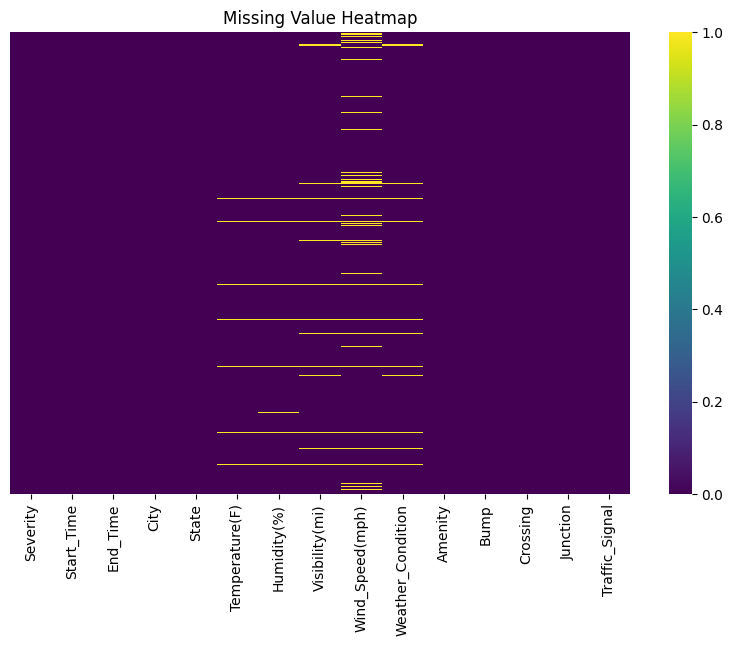

In [6]:
# --- Week 2 Code Cell 1 ---
# Task: Check for missing values and data types
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is loaded from Week 1
print("Missing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

# Visualize missing values (optional but good practice)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [7]:
# --- Week 2 Code Cell 2 ---
# Task: Handle missing values (Example strategy - adapt based on your dataset)
# Example: Fill numerical columns with median, categorical with mode
# Identify numerical and categorical columns (excluding 'Start_Time', 'End_Time' for now)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Fill numerical missing values with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill categorical missing values with mode (most frequent value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

# Check again after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

Numerical columns: ['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
Categorical columns: ['Start_Time', 'End_Time', 'City', 'State', 'Weather_Condition']

Missing Values After Cleaning:
Severity             0
Start_Time           0
End_Time             0
City                 0
State                0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Junction             0
Traffic_Signal       0
dtype: int64


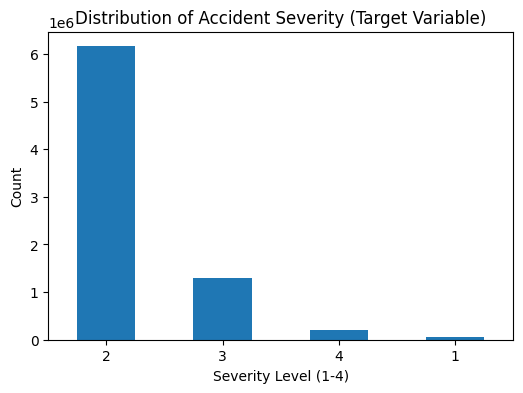

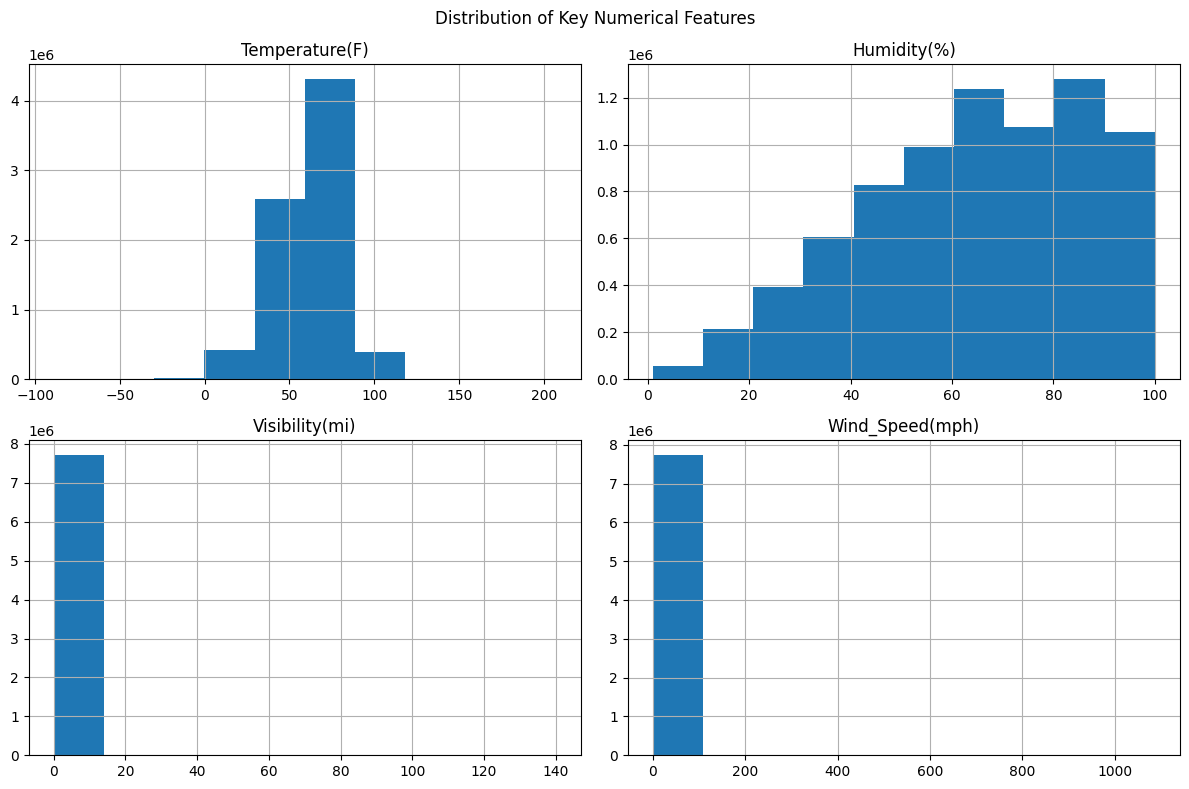

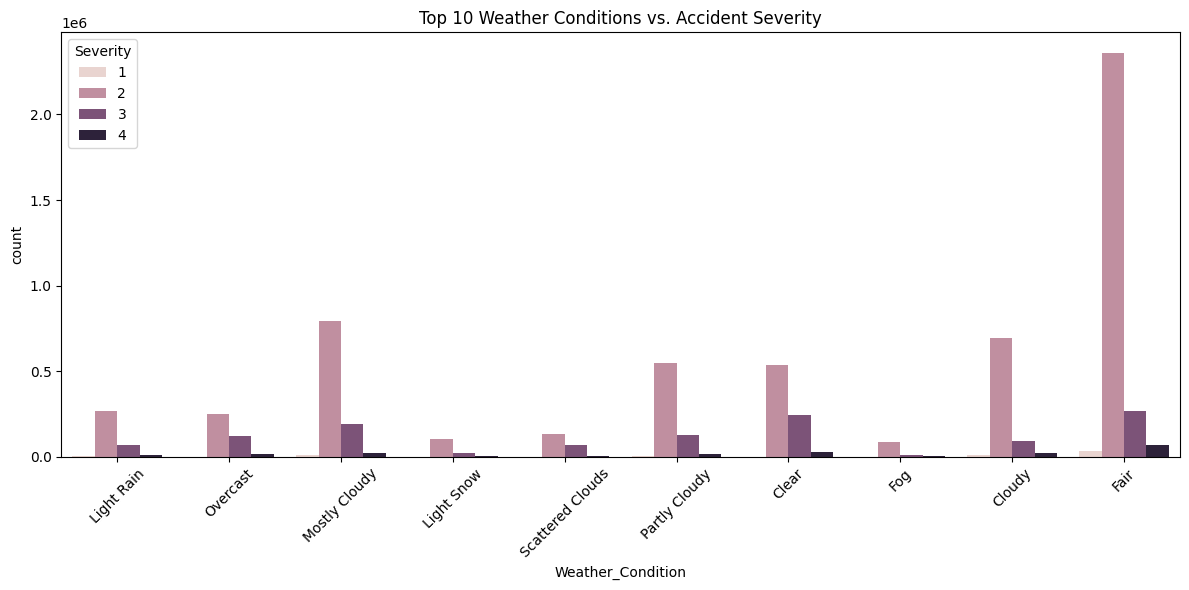

In [8]:
# --- Week 2 Code Cell 3 ---
# Task: Visualize key patterns
# Example: Distribution of target variable (Severity)
plt.figure(figsize=(6, 4))
df['Severity'].value_counts().plot(kind='bar')
plt.title('Distribution of Accident Severity (Target Variable)')
plt.xlabel('Severity Level (1-4)')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.show()

# Example: Distribution of numerical features (sample)
# Select a few key numerical columns for visualization
key_numerical = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
df[key_numerical].hist(figsize=(12, 8))
plt.suptitle('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

# Example: Categorical vs Target (using cross-tabulation or countplot)
# Assuming 'Weather_Condition' is a categorical column
if 'Weather_Condition' in df.columns:
    # Get top 10 weather conditions to avoid clutter
    top_weather = df['Weather_Condition'].value_counts().head(10).index
    filtered_df = df[df['Weather_Condition'].isin(top_weather)]

    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x='Weather_Condition', hue='Severity')
    plt.title('Top 10 Weather Conditions vs. Accident Severity')
    plt.xticks(rotation=45)
    plt.legend(title='Severity')
    plt.tight_layout()
    plt.show()

In [10]:
# --- Week 3 Code Cell 1  ---
# Task: Feature Engineering - Extract Time Information
import pandas as pd
import numpy as np

# Convert Start_Time and End_Time to datetime with error handling
# Use format='mixed' to handle varying precision (including nanoseconds)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')

# Drop rows where datetime conversion failed (if any)
initial_shape = df.shape
df = df.dropna(subset=['Start_Time', 'End_Time'])
final_shape = df.shape
print(f"Dropped {initial_shape[0] - final_shape[0]} rows with invalid datetime.")

# Extract time components
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Month'] = df['Start_Time'].dt.month

# Calculate Duration (in minutes)
df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

# Remove implausible durations (negative or > 7 days)
df = df[(df['Duration(min)'] > 0) & (df['Duration(min)'] < 10080)]  # 7 days = 10080 min

print("Dataset after feature engineering:")
print(df[['Start_Time', 'End_Time', 'Hour', 'DayOfWeek', 'Month', 'Duration(min)', 'Severity']].head())

Dropped 0 rows with invalid datetime.
Dataset after feature engineering:
           Start_Time            End_Time  Hour  DayOfWeek  Month  \
0 2016-02-08 05:46:00 2016-02-08 11:00:00     5          0      2   
1 2016-02-08 06:07:59 2016-02-08 06:37:59     6          0      2   
2 2016-02-08 06:49:27 2016-02-08 07:19:27     6          0      2   
3 2016-02-08 07:23:34 2016-02-08 07:53:34     7          0      2   
4 2016-02-08 07:39:07 2016-02-08 08:09:07     7          0      2   

   Duration(min)  Severity  
0          314.0         3  
1           30.0         2  
2           30.0         2  
3           30.0         3  
4           30.0         2  


In [11]:
# --- Week 3 Code Cell 2 ---
# Task: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (excluding the target if it's categorical here)
categorical_cols_to_encode = [col for col in categorical_cols if col != 'Severity'] # Exclude target

# Initialize the encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols_to_encode:
    if df[col].dtype == 'object': # Only encode object/string columns
        # Optional: Group rare categories into 'Other' to reduce complexity
        # For now, we'll just label encode everything
        df[col] = le.fit_transform(df[col].astype(str)) # Ensure string type before encoding

print("Dataset after encoding (first few rows and columns):")
print(df.head())

Dataset after encoding (first few rows and columns):
   Severity          Start_Time            End_Time   City  State  \
0         3 2016-02-08 05:46:00 2016-02-08 11:00:00   2893     33   
1         2 2016-02-08 06:07:59 2016-02-08 06:37:59  10192     33   
2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  13341     33   
3         3 2016-02-08 07:23:34 2016-02-08 07:53:34   2893     33   
4         2 2016-02-08 07:39:07 2016-02-08 08:09:07   2893     33   

   Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  \
0            36.9         91.0            10.0              7.0   
1            37.9        100.0            10.0              7.0   
2            36.0        100.0            10.0              3.5   
3            35.1         96.0             9.0              4.6   
4            36.0         89.0             6.0              3.5   

   Weather_Condition  Amenity   Bump  Crossing  Junction  Traffic_Signal  \
0                 62    False  False     False     Fa

In [12]:
# --- Week 3 Code Cell 3 ---
# Task: Split Data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Replace 'Severity' with the actual name of your target column if different
X = df.drop(columns=['Severity', 'Start_Time', 'End_Time']) # Features (exclude target and datetime columns)
y = df['Severity'] # Target variable

# Split the  80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (6177254, 16), y_train: (6177254,)
Testing set shape: X_test: (1544314, 16), y_test: (1544314,)


In [1]:
# --- Week 4 Code Cell 1 ---
# Task: Model Building - Example with Random Forest
from sklearn.ensemble import RandomForestClassifier

# Choose a model (Random Forest is a good starting point for mixed data types)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training dataset
model.fit(X_train, y_train)

print("Model trained successfully!")

NameError: name 'X_train' is not defined

In [ ]:
# --- Week 4 Code Cell 2 ---
# Task: Make Predictions
# Predict on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")
print("First 10 predictions:", y_pred[:10])
print("First 10 actual values:", y_test.values[:10])

In [ ]:
# --- Week 5 Code Cell 1 ---
# Task: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
# For multi-class, we often use 'weighted' average to account for class imbalance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (Weighted): {precision:.2f}')
print(f'Recall (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')

# Print a more detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()